# Parcial corte 1

##### *Jesus, Hernan y Mateo*

In [ ]:
#!pip install pycaret[tuners]
from pycaret.classification import setup

In [ ]:
#!pip install pycaret[tuners]
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from itertools import combinations
from xgboost import XGBClassifier
import re
#from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, finalize_model, predict_model, save_model, load_model
import warnings
warnings.filterwarnings("ignore")


In [ ]:
path= "C:/Users/ASUS/Downloads/Parcial IA/"

In [ ]:
%%time
df = pd.read_csv(path  + 'train.csv')
prueba = pd.read_csv(path + "test.csv")

CPU times: total: 234 ms
Wall time: 714 ms


## Tratamiento de datos

In [ ]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [ ]:
df.columns = df.columns.str.replace("'", "")
prueba.columns = prueba.columns.str.replace("'", "")

In [ ]:
ct = ['Marital status','Application mode','Application order','Course','Daytime/evening attendance','Previous qualification','Nacionality','Mothers qualification','Fathers qualification','Mothers occupation','Fathers occupation','Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender','Scholarship holder','International']

for k in ct:
  df[k] = df[k].astype("O")
  prueba[k] = prueba[k].astype("O")

In [ ]:
df.head(2)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.5,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.6,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout


In [ ]:
prueba.head(2)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,1,2,3,152.1,0,0,0,0,0,0,18,0,0,7,0,0,0.000000,0,0,8,0,0,0.0,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,19,4,5,116.5,0,0,0,1,0,0,19,0,0,6,7,6,14.857143,0,0,6,6,6,13.5,0,11.1,0.6,2.02


In [ ]:
df.shape

(76518, 38)

In [ ]:
prueba.shape

(51012, 37)

### Train

In [ ]:
ft = pd.DataFrame(df.isnull().sum()).reset_index()
ft.columns = ["Variable","Faltantes"]
ft["% Faltantes"] = ft["Faltantes"] * 100 / df.shape[0]
ft.loc[ft["% Faltantes"]>0]

,Variable,Faltantes,% Faltantes


In [ ]:
formato = pd.DataFrame({'Variable': list(df.columns), 'Formato': df.dtypes })
ft = pd.merge(ft,formato,on=["Variable"],how="left")
ft.head(10)

,Variable,Faltantes,% Faltantes,Formato
0,id,0,0.0,int64
1,Marital status,0,0.0,object
2,Application mode,0,0.0,object
3,Application order,0,0.0,object
4,Course,0,0.0,object
5,Daytime/evening attendance,0,0.0,object
6,Previous qualification,0,0.0,object
7,Previous qualification (grade),0,0.0,float64
8,Nacionality,0,0.0,object
9,Mothers qualification,0,0.0,object


### Test

In [ ]:
ft2 = pd.DataFrame(prueba.isnull().sum()).reset_index()
ft2.columns = ["Variable","Faltantes"]
ft2["% Faltantes"] = ft2["Faltantes"] * 100 / prueba.shape[0]
ft2.loc[ft2["% Faltantes"]>0]

,Variable,Faltantes,% Faltantes


## Analisis descriptivo

In [ ]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (g

In [ ]:
cuantitativas = list(formato.loc[formato["Formato"]!="object","Variable"])
cuantitativas = [x for x in cuantitativas if x not in ["id","Target"]]

In [ ]:
print(cuantitativas)

['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


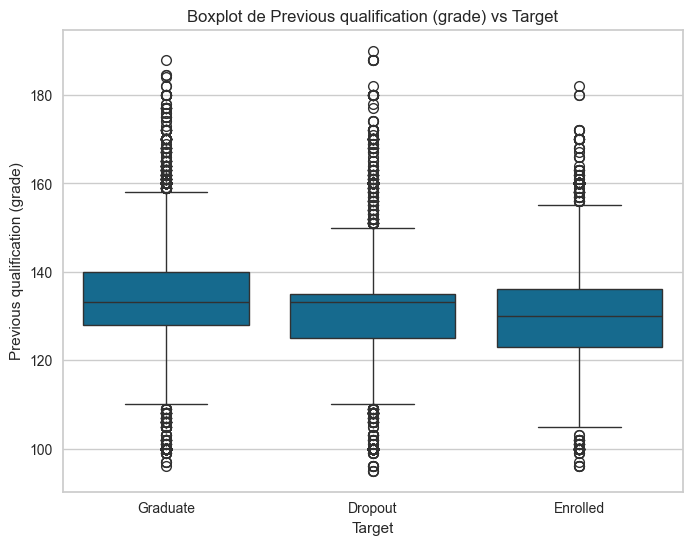

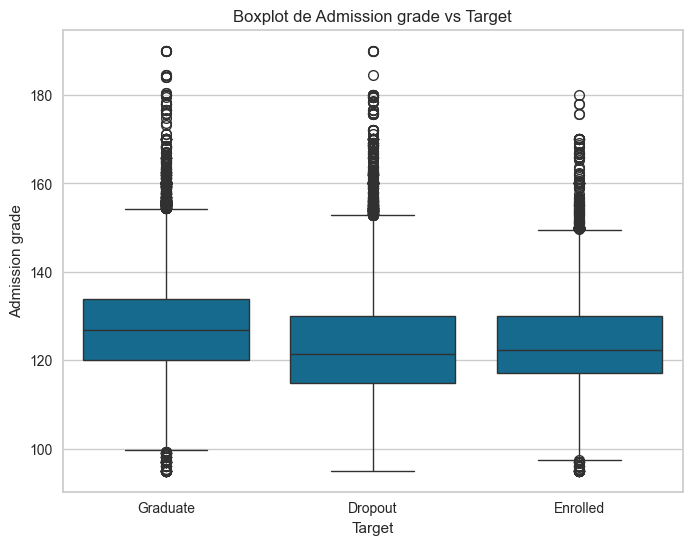

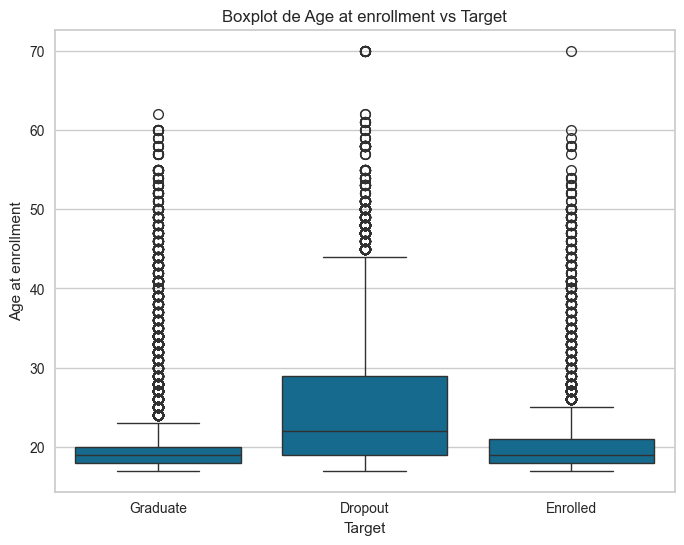

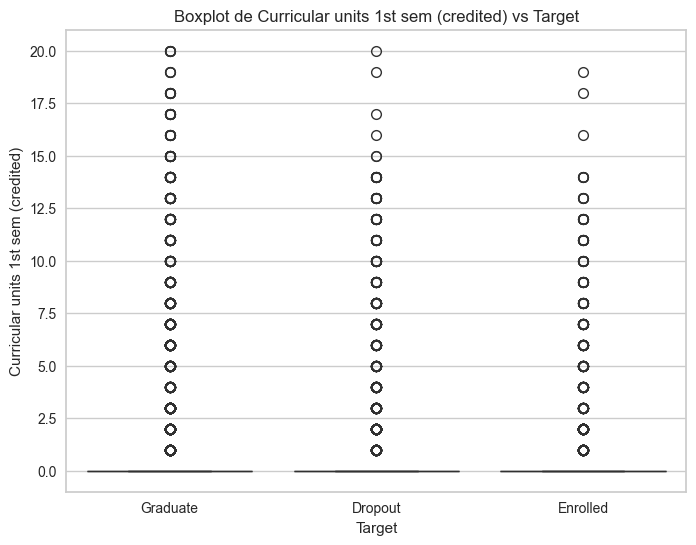

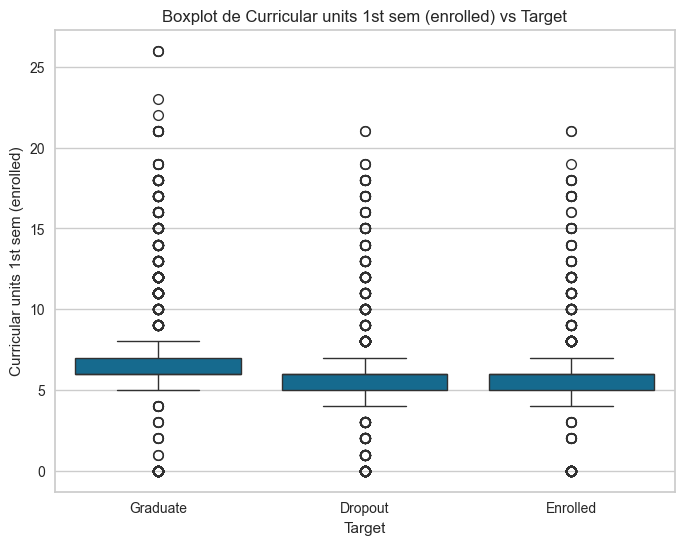

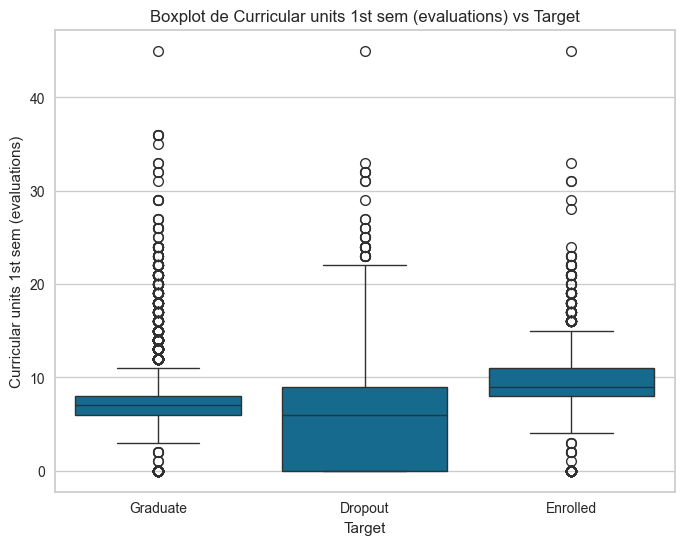

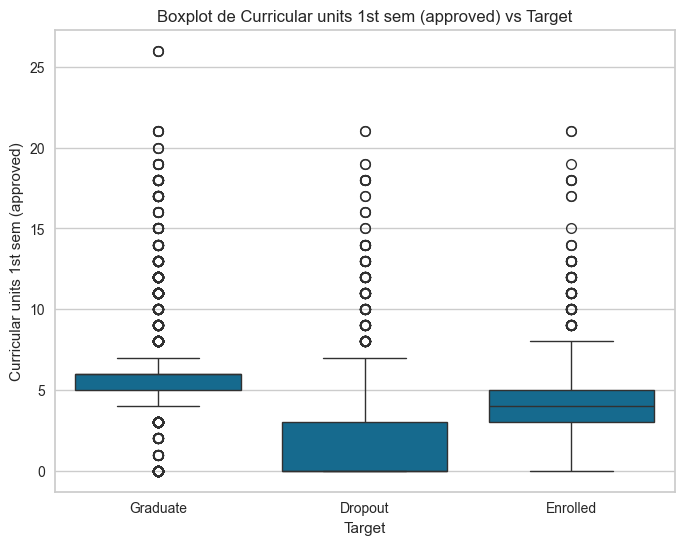

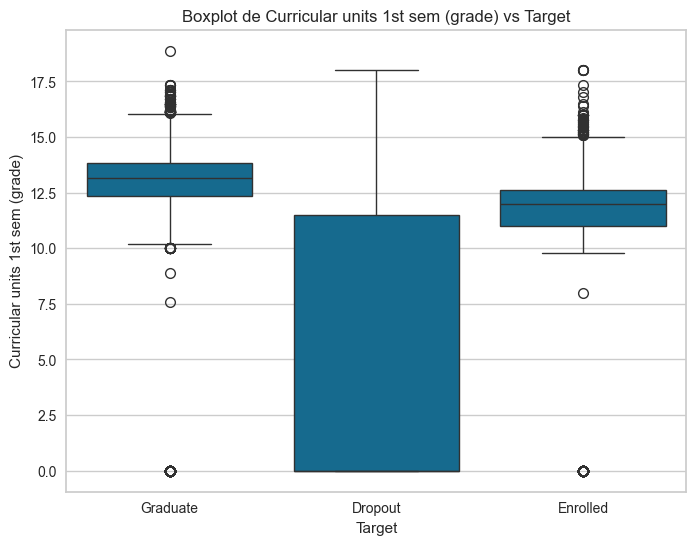

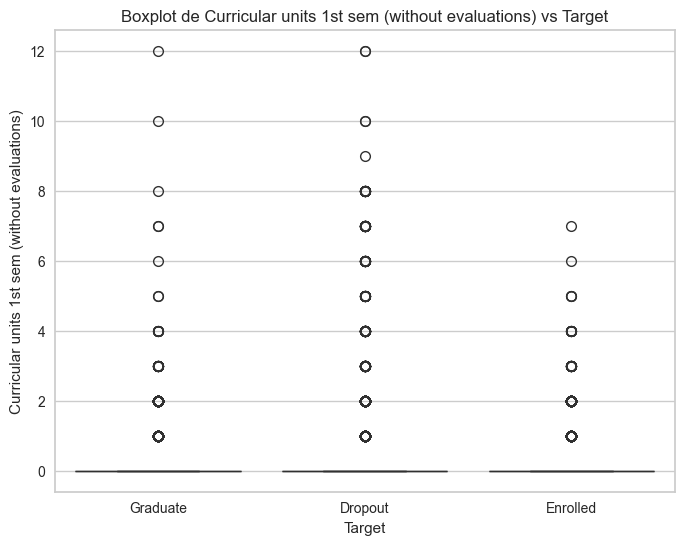

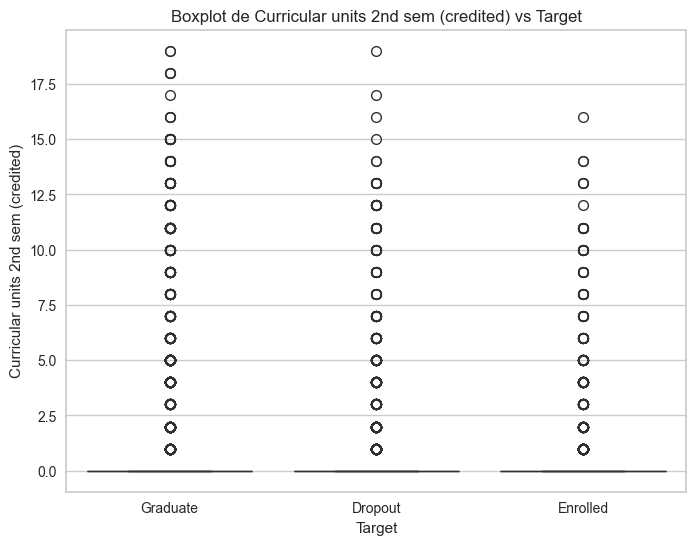

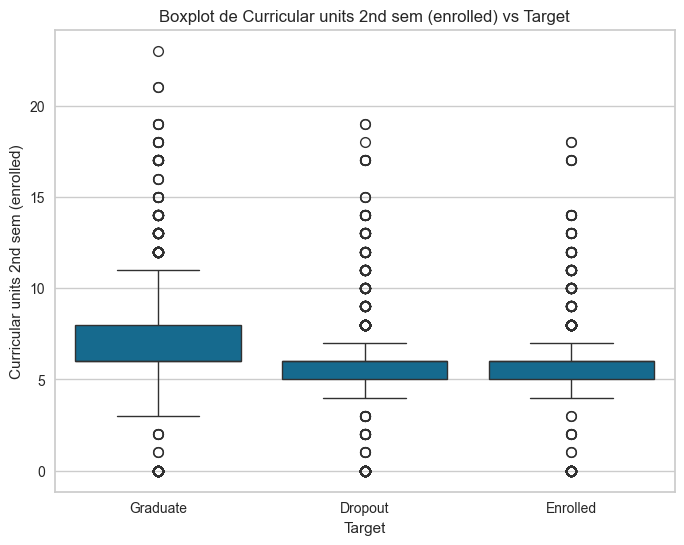

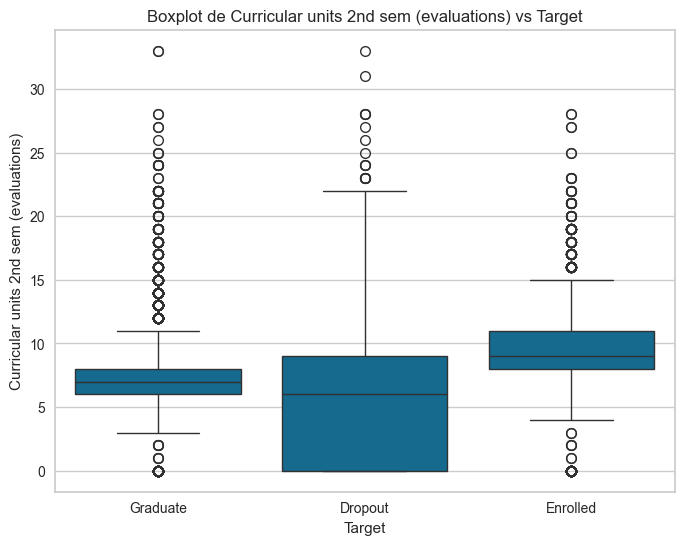

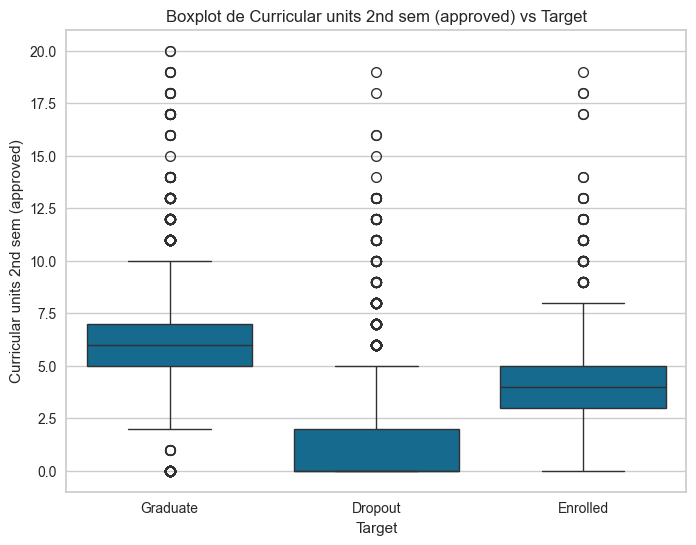

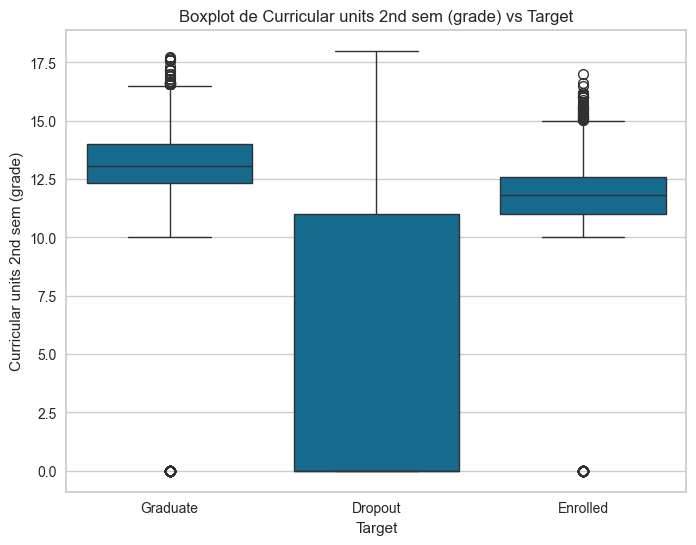

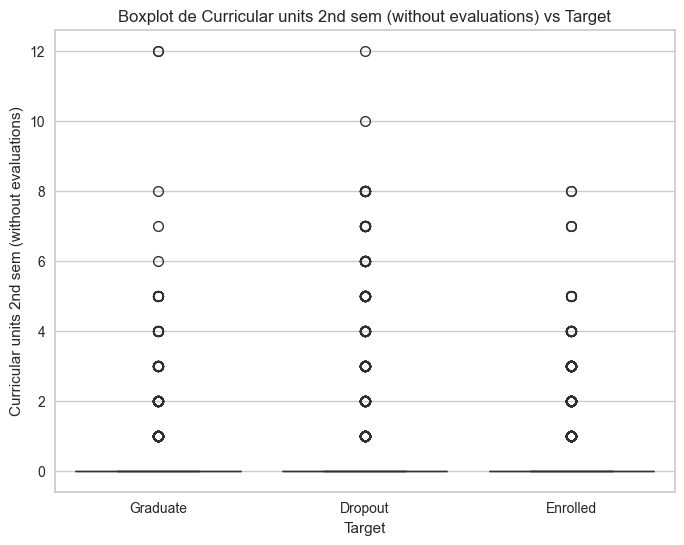

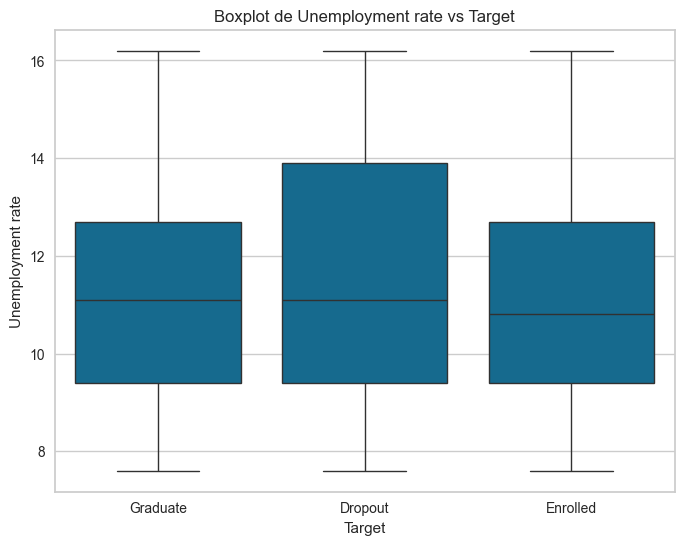

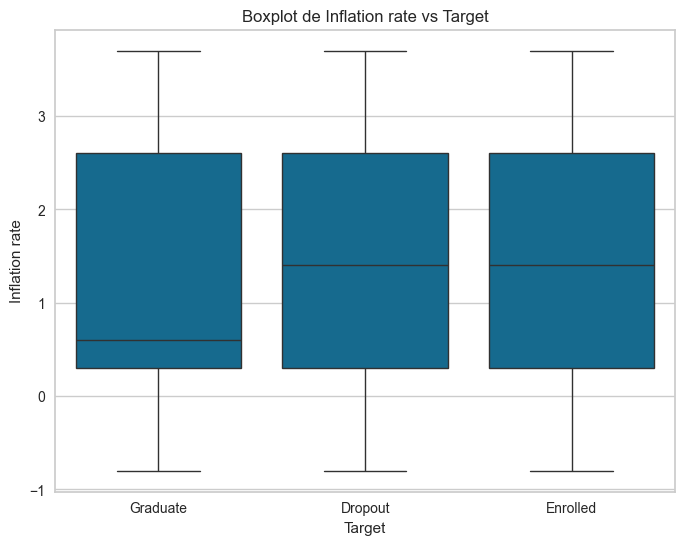

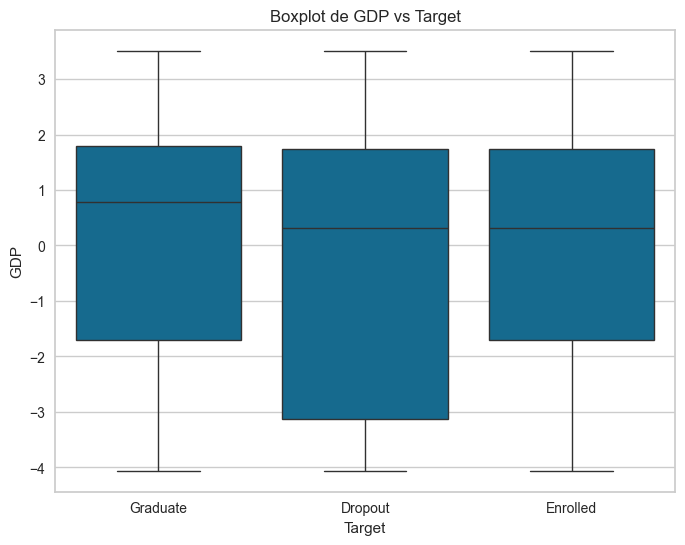

In [ ]:
for k in cuantitativas:
    plt.figure(figsize=(8,6))
    sns.boxplot(x="Target",y=k,data=df)
    plt.title("Boxplot de "+k+" vs Target")

### Descripción


* ### Boxplot de Calificaciones Previas vs Target:

  
- Las calificaciones previas de los estudiantes son similares entre los grupos “Graduate”, “Dropout” y “Enrolled”, con medianas alrededor de 140.
- 	Aunque hay dispersión en los datos, los valores atípicos son más comunes en los extremos superiores, especialmente para los graduados
- Esto o sugiere que las calificaciones previas no son un factor diferenciador claro entre los estudiantes que se gradúan, abandonan o permanecen inscrito


* ### Boxplot de Calificaciones de Admisión vs Target:
- Las calificaciones de admisión son similares entre los tres grupos, con medianas entre 120 y 130.
- 	El rango intercuartílico es más amplio para los graduados y los inscritos, mientras que los que abandonan muestran una distribución más concentrada.
- •	Esto indica que las calificaciones de admisión no influyen significativamente en el resultado final (graduación, abandono o inscripción)

* ### Boxplot de Edad al Momento de la Inscripción vs Target:

- Los estudiantes que abandonan tienen una mayor variabilidad en la edad al momento de la inscripción, con una mediana superior en comparación con los otros grupos.
- Los estudiantes que permanecen inscritos o se gradúan tienden a ser más jóvenes, concentrándose alrededor de los 20-22 años.
- La mayor dispersión en la edad para los estudiantes que abandonan podría indicar que los estudiantes mayores enfrentan más desafíos para completar sus estudios.


* ### Conclusión

- En resumen, el análisis sugiere que las calificaciones previas y de admisión no son factores determinantes para predecir si un estudiante se graduará, abandonará o permanecerá inscrito. En cambio, la edad al momento de la inscripción parece ser un factor más relevante. Los estudiantes mayores tienden a enfrentar más desafíos y tienen una mayor probabilidad de abandonar sus estudios. Esto indica que las políticas educativas y de apoyo deberían enfocarse más en las necesidades específicas de los estudiantes mayores para mejorar sus tasas de retención y éxito académico.
s.


In [ ]:
def asociacion(data):
    categoricas=data.columns[data.dtypes=='O']
    V1=np.array(categoricas); V2=np.array(categoricas)
    grilla=np.meshgrid(V1,V2)
    grilla=pd.DataFrame({'Var1':grilla[0].ravel(),'Var2':grilla[1].ravel()})
    p_value=[stats.chi2_contingency(pd.DataFrame(pd.crosstab(data[grilla.iloc[x]['Var1']],data[grilla.iloc[x]['Var2']])))[1] for x in range(grilla.shape[0])]

    grilla['p_value']=p_value
    grilla2=grilla.pivot(index='Var1',columns='Var2',values='p_value')
    plt.figure(figsize=(10,8))
    gr=sns.heatmap(grilla2,linewidths=0.01,annot=True,fmt='.2f',cmap='summer')
    gr.set_title('Grilla de p valores en prueba chi cuadrado para verificar asociación entre variables')
    plt.xlabel(""); plt.ylabel(""); plt.yticks(rotation=0); plt.xticks(rotation=90)
    plt.show()
    return grilla,grilla2

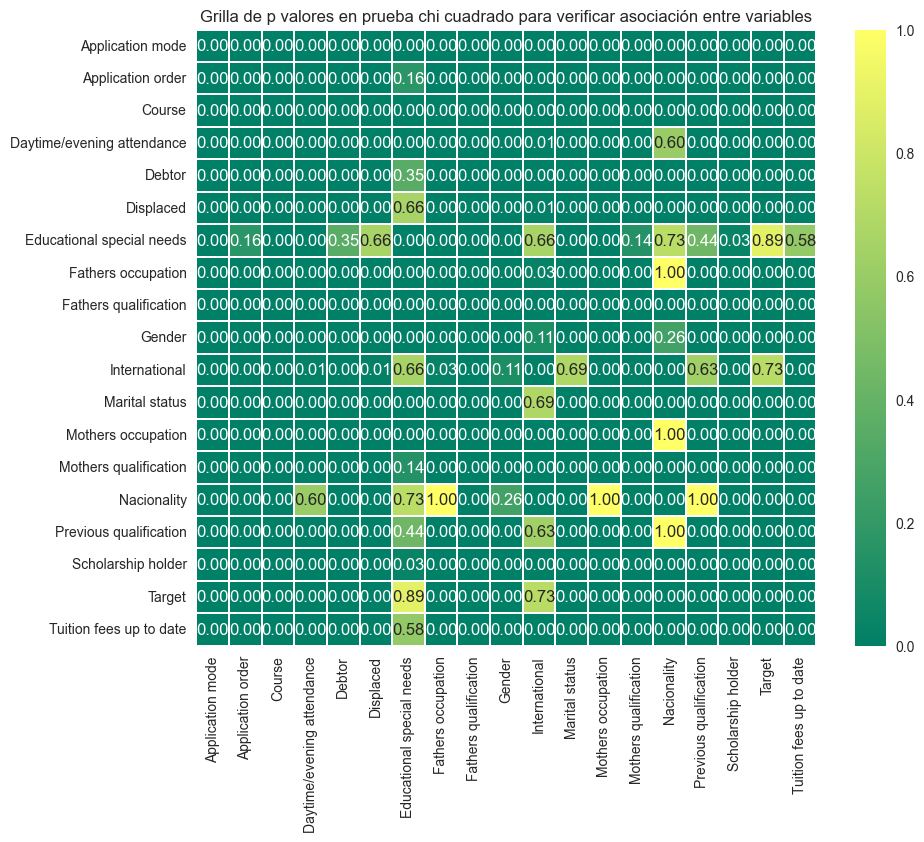

In [ ]:
grilla_asociacion, grilla_asociacion2 = asociacion(df.drop(["id"],axis=1))

### Grilla de P-Valores

- En este gráfico se refleja la matriz de P-valores para verificar la asociación entre variables categóricas. Los valores representan los resultados de la prueba de Chi-cuadrado entre las variables correspondientes. Un P-valor bajo indica que existe una relación estadísticamente significativa, mientras que un valor más alto o cercano a 1 nos indica que las variables no están fuertemente relacionadas.

- Se considera un P-valor inferior a 0.05 como una relación significativa entre las variables, lo cual está marcado en verde. Las celdas amarillas muestran P-valores altos, lo que indica que no hay una asociación significativa entre las variables relacionadas.

- En este caso, podemos observar las relaciones entre las variables, donde es posible identificar visualmente una alta relación entre diferentes tipos de variables una vez aplicada la prueba de Chi-cuadrado.

## Ingeniera de variables

## Variables al cuadrado

In [ ]:
def prueba_kr(x):
  if x<=0.10:
    return 1
  else:
    return 0

def criterion_(df,columns):
  for k in columns:
    df[k] = df[k].map(prueba_kr)
  df["criterio"] = np.sum(df.get(columns),axis=1)
  df["criterio"] = df.apply(lambda row: 1 if row["criterio"]==3 else 0,axis = 1)
  return df

In [ ]:
df["Target"].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [ ]:
base_cuadrado = df.get(cuantitativas).copy()
base_cuadrado["Target"] = df["Target"].copy()

var_names2, pvalue1 = [], []

for k in cuantitativas:
    base_cuadrado[k+"_2"] = base_cuadrado[k] ** 2

    # Prueba de Kruskal sin logaritmo
    mue1 = base_cuadrado.loc[base_cuadrado["Target"]=="Graduate",k+"_2"].to_numpy()
    mue2 = base_cuadrado.loc[base_cuadrado["Target"]=="Dropout",k+"_2"].to_numpy()
    mue3 = base_cuadrado.loc[base_cuadrado["Target"]=="Enrolled",k+"_2"].to_numpy()
    p1 = stats.kruskal(mue1,mue2, mue3)[1]

    # Guardar p values y variables
    var_names2.append(k+"_2")
    pvalue1.append(np.round(p1,2))

In [ ]:
pcuadrado1 = pd.DataFrame({'Variable2':var_names2,'p value':pvalue1})
pcuadrado1["criterio"] = pcuadrado1.apply(lambda row: 1 if row["p value"]<=0.10 else 0,axis = 1)
pcuadrado1.head(5)

,Variable2,p value,criterio
0,Previous qualification (grade)_2,0.0,1
1,Admission grade_2,0.0,1
2,Age at enrollment_2,0.0,1
3,Curricular units 1st sem (credited)_2,0.0,1
4,Curricular units 1st sem (enrolled)_2,0.0,1


### Interacciones cuantitativas

In [ ]:
lista_inter = list(combinations(cuantitativas,2))
base_interacciones = df.get(cuantitativas).copy()
var_interaccion, pv1 = [], []
base_interacciones["Target"] = df["Target"].copy()

for k in lista_inter:
    base_interacciones[k[0]+"__"+k[1]] = base_interacciones[k[0]] * base_interacciones[k[1]]

    # Prueba de Kruskal
    mue1 = base_interacciones.loc[base_interacciones["Target"]=="Graduate",k[0]+"__"+k[1]].to_numpy()
    mue2 = base_interacciones.loc[base_interacciones["Target"]=="Dropout",k[0]+"__"+k[1]].to_numpy()
    mue3 = base_interacciones.loc[base_interacciones["Target"]=="Enrolled",k[0]+"__"+k[1]].to_numpy()

    p1 = stats.kruskal(mue1, mue2, mue3)[1]

    var_interaccion.append(k[0]+"__"+k[1])
    pv1.append(np.round(p1,2))

In [ ]:
pxy = pd.DataFrame({'Variable':var_interaccion,'p value':pv1})
pxy["criterio"] = pxy.apply(lambda row: 1 if row["p value"]<=0.10 else 0, axis = 1)
pxy.head()

,Variable,p value,criterio
0,Previous qualification (grade)__Admission grade,0.0,1
1,Previous qualification (grade)__Age at enrollment,0.0,1
2,Previous qualification (grade)__Curricular uni...,0.0,1
3,Previous qualification (grade)__Curricular uni...,0.0,1
4,Previous qualification (grade)__Curricular uni...,0.0,1


## Razones

In [ ]:
raz1 = [(x,y) for x in cuantitativas for y in cuantitativas]
base_razones1 = df.get(cuantitativas).copy()
base_razones1["Target"] = df["Target"].copy()

var_nm, pval = [], []
for j in raz1:
    if j[0]!=j[1]:
        base_razones1[j[0]+"__coc__"+j[1]] = base_razones1[j[0]] / (base_razones1[j[1]]+0.01)

        # Prueba de Kruskal
        mue1 = base_razones1.loc[base_razones1["Target"] == "Graduate", j[0] + "__coc__" + j[1]].to_numpy()
        mue2 = base_razones1.loc[base_razones1["Target"] == "Dropout", j[0] + "__coc__" + j[1]].to_numpy()
        mue3 = base_razones1.loc[base_razones1["Target"] == "Enrolled", j[0] + "__coc__" + j[1]].to_numpy()

        p1 = stats.kruskal(mue1, mue2, mue3)[1]

        # Guardar valores
        var_nm.append(j[0]+"__coc__"+j[1])
        pval.append(np.round(p1,2))

In [ ]:
prazones = pd.DataFrame({'Variable':var_nm,'p value':pval})
prazones["criterio"] = prazones.apply(lambda row: 1 if row["p value"]<=0.10 else 0, axis = 1)
prazones.head()

,Variable,p value,criterio
0,Previous qualification (grade)__coc__Admission...,0.0,1
1,Previous qualification (grade)__coc__Age at en...,0.0,1
2,Previous qualification (grade)__coc__Curricula...,0.0,1
3,Previous qualification (grade)__coc__Curricula...,0.0,1
4,Previous qualification (grade)__coc__Curricula...,0.0,1


## Interacciones categoricas

In [ ]:
categoricas = list(formato.loc[formato["Formato"]=="O","Variable"])
categoricas = [x for x in categoricas if x not in ["id","Target"]]

def nombre_(x):
  return "C"+str(x)

In [ ]:
cb = list(combinations(categoricas,2))
p_value, modalidades, nombre_var = [], [], []

base2 = df.get(categoricas).copy()
for k in base2.columns:
  base2[k] = base2[k].map(nombre_)

base2["Target"] = df["Target"].copy()

for k in range(len(cb)):
    # Variable con interacción
    base2[cb[k][0]] = base2[cb[k][0]]
    base2[cb[k][1]] = base2[cb[k][1]]

    base2[cb[k][0]+"__"+cb[k][1]] = base2[cb[k][0]] + "__" + base2[cb[k][1]]

    # Prueba chi cuadrado
    c1 = pd.DataFrame(pd.crosstab(base2["Target"],base2[cb[k][0]+"__"+cb[k][1]]))
    pv = stats.chi2_contingency(c1)[1]

    # Número de modalidades por categoría
    mod_ = len(base2[cb[k][0]+"__"+cb[k][1]].unique())

    # Guardar p value y modalidades
    nombre_var.append(cb[k][0]+"__"+cb[k][1])
    modalidades.append(mod_)
    p_value.append(pv)

In [ ]:
pc = pd.DataFrame({'Variable':nombre_var,'Num Modalidades':modalidades,'p value':p_value})
pc.loc[(pc["p value"]<=0.20) & (pc["Num Modalidades"]<=8),].sort_values(["p value"],ascending=True).head()

,Variable,Num Modalidades,p value
68,Daytime/evening attendance__Displaced,4,0.0
150,Gender__Scholarship holder,4,0.0
149,Tuition fees up to date__International,4,0.0
148,Tuition fees up to date__Scholarship holder,4,0.0
147,Tuition fees up to date__Gender,4,0.0


## Dummies categóricas más significativas (p value <= 0.20 y bajo número de modalidades)

In [ ]:
def indicadora(x):
  if x==True:
    return 1
  else:
    return 0

seleccion1 = list(pc.loc[(pc["p value"]<=0.20) & (pc["Num Modalidades"]<=8),"Variable"])
sel1 = base2.get(seleccion1)

contador = 0
for k in sel1:
    if contador==0:
        lb1 = pd.get_dummies(sel1[k],drop_first=True)
        lb1.columns = [k + "_" + x for x in lb1.columns]
    else:
        lb2 = pd.get_dummies(sel1[k],drop_first=True)
        lb2.columns = [k + "_" + x for x in lb2.columns]
        lb1 = pd.concat([lb1,lb2],axis=1)
    contador = contador + 1

for k in lb1.columns:
  lb1[k] = lb1[k].map(indicadora)

lb1["Target"] = df["Target"].copy()
lb1.head()

,Daytime/evening attendance__Displaced_C0__C1,Daytime/evening attendance__Displaced_C1__C0,Daytime/evening attendance__Displaced_C1__C1,Daytime/evening attendance__Educational special needs_C0__C1,Daytime/evening attendance__Educational special needs_C1__C0,Daytime/evening attendance__Educational special needs_C1__C1,Daytime/evening attendance__Debtor_C0__C1,Daytime/evening attendance__Debtor_C1__C0,Daytime/evening attendance__Debtor_C1__C1,Daytime/evening attendance__Tuition fees up to date_C0__C1,Daytime/evening attendance__Tuition fees up to date_C1__C0,Daytime/evening attendance__Tuition fees up to date_C1__C1,Daytime/evening attendance__Gender_C0__C1,Daytime/evening attendance__Gender_C1__C0,Daytime/evening attendance__Gender_C1__C1,Daytime/evening attendance__Scholarship holder_C0__C1,Daytime/evening attendance__Scholarship holder_C1__C0,Daytime/evening attendance__Scholarship holder_C1__C1,Daytime/evening attendance__International_C0__C1,Daytime/evening attendance__International_C1__C0,Daytime/evening attendance__International_C1__C1,Displaced__Educational special needs_C0__C1,Displaced__Educational special needs_C1__C0,Displaced__Educational special needs_C1__C1,Displaced__Debtor_C0__C1,Displaced__Debtor_C1__C0,Displaced__Debtor_C1__C1,Displaced__Tuition fees up to date_C0__C1,Displaced__Tuition fees up to date_C1__C0,Displaced__Tuition fees up to date_C1__C1,Displaced__Gender_C0__C1,Displaced__Gender_C1__C0,Displaced__Gender_C1__C1,Displaced__Scholarship holder_C0__C1,Displaced__Scholarship holder_C1__C0,Displaced__Scholarship holder_C1__C1,Displaced__International_C0__C1,Displaced__International_C1__C0,Displaced__International_C1__C1,Educational special needs__Debtor_C0__C1,Educational special needs__Debtor_C1__C0,Educational special needs__Debtor_C1__C1,Educational special needs__Tuition fees up to date_C0__C1,Educational special needs__Tuition fees up to date_C1__C0,Educational special needs__Tuition fees up to date_C1__C1,Educational special needs__Gender_C0__C1,Educational special needs__Gender_C1__C0,Educational special needs__Gender_C1__C1,Educational special needs__Scholarship holder_C0__C1,Educational special needs__Scholarship holder_C1__C0,Educational special needs__Scholarship holder_C1__C1,Debtor__Tuition fees up to date_C0__C1,Debtor__Tuition fees up to date_C1__C0,Debtor__Tuition fees up to date_C1__C1,Debtor__Gender_C0__C1,Debtor__Gender_C1__C0,Debtor__Gender_C1__C1,Debtor__Scholarship holder_C0__C1,Debtor__Scholarship holder_C1__C0,Debtor__Scholarship holder_C1__C1,Debtor__International_C0__C1,Debtor__International_C1__C0,Debtor__International_C1__C1,Tuition fees up to date__Gender_C0__C1,Tuition fees up to date__Gender_C1__C0,Tuition fees up to date__Gender_C1__C1,Tuition fees up to date__Scholarship holder_C0__C1,Tuition fees up to date__Scholarship holder_C1__C0,Tuition fees up to date__Scholarship holder_C1__C1,Tuition fees up to date__International_C0__C1,Tuition fees up to date__International_C1__C0,Tuition fees up to date__International_C1__C1,Gender__Scholarship holder_C0__C1,Gender__Scholarship holder_C1__C0,Gender__Scholarship holder_C1__C1,Gender__International_C0__C1,Gender__International_C1__C0,Gender__International_C1__C1,Scholarship holder__International_C0__C1,Scholarship holder__International_C1__C0,Scholarship holder__International_C1__C1,Target
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,Graduate
1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,Dropout
2,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,Dropout
3,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0

## Interacción cuantitativa vs categorica

In [ ]:
cat_cuanti = [(x,y) for x in cuantitativas for y in categoricas]
cat_cuanti[0]

('Previous qualification (grade)', 'Marital status')

In [ ]:
v1, v2, pvalores_min, pvalores_max  = [], [], [], []

for j in cat_cuanti:
    k1 = j[0]
    k2 = j[1]

    g1 = pd.get_dummies(df[k2])
    lt1 = list(g1.columns)

    for k in lt1:
        g1[k] = g1[k] * df[k1]

    g1["Target"] = df["Target"].copy()

    pvalues_c = []
    for y in lt1:
        mue1 = g1.loc[g1["Target"]=="Graduate",y].to_numpy()
        mue2 = g1.loc[g1["Target"]=="Dropout",y].to_numpy()
        mue3 = g1.loc[g1["Target"]=="Enrolled",y].to_numpy()

        try:
          pval = (stats.kruskal(mue1,mue2,mue3)[1]<=0.20)
          if pval==True:
              pval = 1
          else:
              pval = 0
        except ValueError:
          pval = 0
        pvalues_c.append(pval)

    min_ = np.min(pvalues_c) # Se revisa si alguna de las categorías no es significativa
    max_ = np.max(pvalues_c) # Se revisa si alguna de las categorías es significativa
    v1.append(k1) # nombre de la variable 1
    v2.append(k2) # nombre de la variable 2
    pvalores_min.append(np.round(min_,2))
    pvalores_max.append(np.round(max_,2))

In [ ]:
pc2 = pd.DataFrame({'Cuantitativa':v1,'Categórica':v2,'p value':pvalores_min, 'p value max':pvalores_max})
pc2.loc[(pc2["p value"]==1) & (pc2["p value max"]==1),]

,Cuantitativa,Categórica,p value,p value max
4,Previous qualification (grade),Daytime/evening attendance,1,1
11,Previous qualification (grade),Displaced,1,1
13,Previous qualification (grade),Debtor,1,1
14,Previous qualification (grade),Tuition fees up to date,1,1
15,Previous qualification (grade),Gender,1,1
...,...,...,...,...
319,GDP,Debtor,1,1
320,GDP,Tuition fees up to date,1,1
321,GDP,Gender,1,1
322,GDP,Scholarship holder,1,1


## Feature enginnering

In [ ]:
v1 = list(pc2.loc[(pc2["p value"]==1) & (pc2["p value max"]==1),"Cuantitativa"])
v2 = list(pc2.loc[(pc2["p value"]==1) & (pc2["p value max"]==1),"Categórica"])

In [ ]:
for j in range(len(v1)):

    if j==0:
        g1 = pd.get_dummies(df[v2[j]],drop_first=True)
        lt1 = list(g1.columns)
        for k in lt1:
            g1[k] = g1[k] * df[v1[j]]
        g1.columns = [v1[j] + "_" + v2[j] + "_" + str(x) for x in lt1]
    else:
        g2 = pd.get_dummies(df[v2[j]],drop_first=True)
        lt1 = list(g2.columns)
        for k in lt1:
            g2[k] = g2[k] * df[v1[j]]
        g2.columns = [v1[j] + "_" + v2[j] + "_" + str(x) for x in lt1]
        g1 = pd.concat([g1,g2],axis=1)

g1["Target"] = df["Target"].copy()
g1.head()

,Previous qualification (grade)_Daytime/evening attendance_1,Previous qualification (grade)_Displaced_1,Previous qualification (grade)_Debtor_1,Previous qualification (grade)_Tuition fees up to date_1,Previous qualification (grade)_Gender_1,Previous qualification (grade)_Scholarship holder_1,Admission grade_Daytime/evening attendance_1,Admission grade_Displaced_1,Admission grade_Debtor_1,Admission grade_Tuition fees up to date_1,Admission grade_Gender_1,Admission grade_Scholarship holder_1,Age at enrollment_Daytime/evening attendance_1,Age at enrollment_Displaced_1,Age at enrollment_Debtor_1,Age at enrollment_Tuition fees up to date_1,Age at enrollment_Gender_1,Age at enrollment_Scholarship holder_1,Curricular units 1st sem (credited)_Daytime/evening attendance_1,Curricular units 1st sem (credited)_Displaced_1,Curricular units 1st sem (credited)_Debtor_1,Curricular units 1st sem (credited)_Tuition fees up to date_1,Curricular units 1st sem (credited)_Gender_1,Curricular units 1st sem (credited)_Scholarship holder_1,Curricular units 1st sem (enrolled)_Daytime/evening attendance_1,Curricular units 1st sem (enrolled)_Displaced_1,Curricular units 1st sem (enrolled)_Debtor_1,Curricular units 1st sem (enrolled)_Tuition fees up to date_1,Curricular units 1st sem (enrolled)_Gender_1,Curricular units 1st sem (enrolled)_Scholarship holder_1,Curricular units 1st sem (evaluations)_Daytime/evening attendance_1,Curricular units 1st sem (evaluations)_Displaced_1,Curricular units 1st sem (evaluations)_Educational special needs_1,Curricular units 1st sem (evaluations)_Debtor_1,Curricular units 1st sem (evaluations)_Tuition fees up to date_1,Curricular units 1st sem (evaluations)_Gender_1,Curricular units 1st sem (evaluations)_Scholarship holder_1,Curricular units 1st sem (evaluations)_International_1,Curricular units 1st sem (approved)_Daytime/evening attendance_1,Curricular units 1st sem (approved)_Displaced_1,Curricular units 1st sem (approved)_Educational special needs_1,Curricular units 1st sem (approved)_Debtor_1,Curricular units 1st sem (approved)_Tuition fees up to date_1,Curricular units 1st sem (approved)_Gender_1,Curricular units 1st sem (approved)_Scholarship holder_1,Curricular units 1st sem (approved)_International_1,Curricular units 1st sem (grade)_Daytime/evening attendance_1,Curricular units 1st sem (grade)_Displaced_1,Curricular units 1st sem (grade)_Educational special needs_1,Curricular units 1st sem (grade)_Debtor_1,Curricular units 1st sem (grade)_Tuition fees up to date_1,Curricular units 1st sem (grade)_Gender_1,Curricular units 1st sem (grade)_Scholarship holder_1,Curricular units 1st sem (grade)_International_1,Curricular units 1st sem (without evaluations)_Daytime/evening attendance_1,Curricular units 1st sem (without evaluations)_Displaced_1,Curricular units 1st sem (without evaluations)_Educational special needs_1,Curricular units 1st sem (without evaluations)_Debtor_1,Curricular units 1st sem (without evaluations)_Tuition fees up to date_1,Curricular units 1st sem (without evaluations)_Gender_1,Curricular units 1st sem (without evaluations)_Scholarship holder_1,Curricular units 1st sem (without evaluations)_International_1,Curricular units 2nd sem (credited)_Daytime/evening attendance_1,Curricular units 2nd sem (credited)_Displaced_1,Curricular units 2nd sem (credited)_Educational special needs_1,Curricular units 2nd sem (credited)_Debtor_1,Curricular units 2nd sem (credited)_Tuition fees up to date_1,Curricular units 2nd sem (credited)_Gender_1,Curricular units 2nd sem (credited)_Scholarship holder_1,Curricular units 2nd sem (enrolled)_Daytime/evening attendance_1,Curricular units 2nd sem (enrolled)_Displaced_1,Curricular units 2nd sem (enrolled)_Debtor_1,Curricular units 2nd sem (enrolled)_Tuition fees up to date_1,Curricular units 2nd sem (enrolled)_Gender_1,Curricular units 2nd sem (enrolled)_Scholarship holder_1,Curricular units 2nd sem (evaluations)_Daytime/evening attendance_1,Curricular units 2nd sem (evalu

## Selección de variables con Xgboost

#### Variables al cuadrado

In [ ]:
pcuadrado1.head(10)

,Variable2,p value,criterio
0,Previous qualification (grade)_2,0.0,1
1,Admission grade_2,0.0,1
2,Age at enrollment_2,0.0,1
3,Curricular units 1st sem (credited)_2,0.0,1
4,Curricular units 1st sem (enrolled)_2,0.0,1
5,Curricular units 1st sem (evaluations)_2,0.0,1
6,Curricular units 1st sem (approved)_2,0.0,1
7,Curricular units 1st sem (grade)_2,0.0,1
8,Curricular units 1st sem (without evaluations)_2,0.0,1
9,Curricular units 2nd sem (credited)_2,0.0,1


In [ ]:
var_cuad = list(pcuadrado1["Variable2"])
base_modelo1 = base_cuadrado.get(var_cuad+["Target"])
mapping = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}
base_modelo1["Target"] = base_modelo1["Target"].map(mapping)
base_modelo1.head()

,Previous qualification (grade)_2,Admission grade_2,Age at enrollment_2,Curricular units 1st sem (credited)_2,Curricular units 1st sem (enrolled)_2,Curricular units 1st sem (evaluations)_2,Curricular units 1st sem (approved)_2,Curricular units 1st sem (grade)_2,Curricular units 1st sem (without evaluations)_2,Curricular units 2nd sem (credited)_2,Curricular units 2nd sem (enrolled)_2,Curricular units 2nd sem (evaluations)_2,Curricular units 2nd sem (approved)_2,Curricular units 2nd sem (grade)_2,Curricular units 2nd sem (without evaluations)_2,Unemployment rate_2,Inflation rate_2,GDP_2,Target
0,15876.0,15030.76,324,0,36,36,36,210.250000,0,0,36,49,36,154.469388,0,123.21,0.36,4.0804,0
1,15625.0,14352.04,324,0,36,64,16,134.560000,0,0,36,81,0,0.000000,0,123.21,0.36,4.0804,1
2,18769.0,20938.09,324,0,36,0,0,0.000000,0,0,36,0,0,0.000000,0,262.44,0.09,0.8464,1
3,17161.0,15901.21,324,0,49,81,49,158.539577,0,0,64,121,49,164.352400,0,123.21,0.36,4.0804,2
4,17424.0,14424.01,324,0,49,144,36,167.271111,0,0,49,144,36,167.271111,0,57.76,6.76,0.1024,0


In [ ]:
cov = list(base_modelo1.columns)
cov = [x for x in cov if x not in ["Target"]]

X1 = base_modelo1.get(cov)
y1 = base_modelo1.get(["Target"])

modelo1 = XGBClassifier()
modelo1 = modelo1.fit(X1,y1)

importancias = modelo1.feature_importances_
imp1 = pd.DataFrame({'Variable':X1.columns,'Importancia':importancias})
imp1["Importancia"] = imp1["Importancia"] * 100 / np.sum(imp1["Importancia"])
imp1 = imp1.sort_values(["Importancia"],ascending=False)
imp1.index = range(imp1.shape[0])
imp1.head()

,Variable,Importancia
0,Curricular units 2nd sem (approved)_2,70.808601
1,Curricular units 2nd sem (enrolled)_2,4.378178
2,Curricular units 2nd sem (evaluations)_2,4.194392
3,Curricular units 1st sem (approved)_2,2.990436
4,Curricular units 1st sem (enrolled)_2,2.726732


## Interacciones cuantitativas

In [ ]:
pxy.head()

,Variable,p value,criterio
0,Previous qualification (grade)__Admission grade,0.0,1
1,Previous qualification (grade)__Age at enrollment,0.0,1
2,Previous qualification (grade)__Curricular uni...,0.0,1
3,Previous qualification (grade)__Curricular uni...,0.0,1
4,Previous qualification (grade)__Curricular uni...,0.0,1


In [ ]:
var_int = list(pxy["Variable"])
base_modelo2 = base_interacciones.get(var_int+["Target"])
mapping = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}
base_modelo2["Target"] = base_modelo2["Target"].map(mapping)
base_modelo2.head()

,Previous qualification (grade)__Admission grade,Previous qualification (grade)__Age at enrollment,Previous qualification (grade)__Curricular units 1st sem (credited),Previous qualification (grade)__Curricular units 1st sem (enrolled),Previous qualification (grade)__Curricular units 1st sem (evaluations),Previous qualification (grade)__Curricular units 1st sem (approved),Previous qualification (grade)__Curricular units 1st sem (grade),Previous qualification (grade)__Curricular units 1st sem (without evaluations),Previous qualification (grade)__Curricular units 2nd sem (credited),Previous qualification (grade)__Curricular units 2nd sem (enrolled),Previous qualification (grade)__Curricular units 2nd sem (evaluations),Previous qualification (grade)__Curricular units 2nd sem (approved),Previous qualification (grade)__Curricular units 2nd sem (grade),Previous qualification (grade)__Curricular units 2nd sem (without evaluations),Previous qualification (grade)__Unemployment rate,Previous qualification (grade)__Inflation rate,Previous qualification (grade)__GDP,Admission grade__Age at enrollment,Admission grade__Curricular units 1st sem (credited),Admission grade__Curricular units 1st sem (enrolled),Admission grade__Curricular units 1st sem (evaluations),Admission grade__Curricular units 1st sem (approved),Admission grade__Curricular units 1st sem (grade),Admission grade__Curricular units 1st sem (without evaluations),Admission grade__Curricular units 2nd sem (credited),Admission grade__Curricular units 2nd sem (enrolled),Admission grade__Curricular units 2nd sem (evaluations),Admission grade__Curricular units 2nd sem (approved),Admission grade__Curricular units 2nd sem (grade),Admission grade__Curricular units 2nd sem (without evaluations),Admission grade__Unemployment rate,Admission grade__Inflation rate,Admission grade__GDP,Age at enrollment__Curricular units 1st sem (credited),Age at enrollment__Curricular units 1st sem (enrolled),Age at enrollment__Curricular units 1st sem (evaluations),Age at enrollment__Curricular units 1st sem (approved),Age at enrollment__Curricular units 1st sem (grade),Age at enrollment__Curricular units 1st sem (without evaluations),Age at enrollment__Curricular units 2nd sem (credited),Age at enrollment__Curricular units 2nd sem (enrolled),Age at enrollment__Curricular units 2nd sem (evaluations),Age at enrollment__Curricular units 2nd sem (approved),Age at enrollment__Curricular units 2nd sem (grade),Age at enrollment__Curricular units 2nd sem (without evaluations),Age at enrollment__Unemployment rate,Age at enrollment__Inflation rate,Age at enrollment__GDP,Curricular units 1st sem (credited)__Curricular units 1st sem (enrolled),Curricular units 1st sem (credited)__Curricular units 1st sem (evaluations),Curricular units 1st sem (credited)__Curricular units 1st sem (approved),Curricular units 1st sem (credited)__Curricular units 1st sem (grade),Curricular units 1st sem (credited)__Curricular units 1st sem (without evaluations),Curricular units 1st sem (credited)__Curricular units 2nd sem (credited),Curricular units 1st sem (credited)__Curricular units 2nd sem (enrolled),Curricular units 1st sem (credited)__Curricular units 2nd sem (evaluations),Curricular units 1st sem (credited)__Curricular units 2nd sem (approved),Curricular units 1st sem (credited)__Curricular units 2nd sem (grade),Curricular units 1st sem (credited)__Curricular units 2nd sem (without evaluations),Curricular units 1st sem (credited)__Unemployment rate,Curricular units 1st sem (credited)__Inflation rate,Curricular units 1st sem (credited)__GDP,Curricular units 1st sem (enrolled)__Curricular units 1st sem (evaluations),Curricular units 1st sem (enrolled)__Curricular units 1st sem (approved),Curricular units 1st sem (enrolled)__Curricular units 1st sem (grade),Curricular units 1st sem (enrolled)__Curricular units 1st sem (without evaluations),Curricular units 1st sem (enrolled)__Curricular units 2nd sem (credited),Curricular units 1st sem

In [ ]:
cov = list(base_modelo2.columns)
cov = [x for x in cov if x not in ["Target"]]

X2 = base_modelo2.get(cov)
y2 = base_modelo2.get(["Target"])

modelo2 = XGBClassifier()
modelo2 = modelo2.fit(X2,y2)

importancias = modelo2.feature_importances_
imp2 = pd.DataFrame({'Variable':X2.columns,'Importancia':importancias})
imp2["Importancia"] = imp2["Importancia"] * 100 / np.sum(imp2["Importancia"])
imp2 = imp2.sort_values(["Importancia"],ascending=False)
imp2.index = range(imp2.shape[0])
imp2.head(8)

,Variable,Importancia
0,Curricular units 2nd sem (approved)__Curricula...,19.316521
1,Admission grade__Curricular units 2nd sem (app...,14.658401
2,Curricular units 1st sem (approved)__Curricula...,7.187466
3,Curricular units 1st sem (grade)__Curricular u...,6.013840
4,Curricular units 1st sem (evaluations)__Curric...,4.931830
5,Age at enrollment__Curricular units 2nd sem (e...,3.025591
6,Curricular units 1st sem (enrolled)__Curricula...,2.240528
7,Curricular units 2nd sem (evaluations)__Curric...,1.637805


## Razones

In [ ]:
prazones.head()

,Variable,p value,criterio
0,Previous qualification (grade)__coc__Admission...,0.0,1
1,Previous qualification (grade)__coc__Age at en...,0.0,1
2,Previous qualification (grade)__coc__Curricula...,0.0,1
3,Previous qualification (grade)__coc__Curricula...,0.0,1
4,Previous qualification (grade)__coc__Curricula...,0.0,1


In [ ]:
var_raz = list(prazones["Variable"])
base_modelo3 = base_razones1.get(var_raz+["Target"])
mapping = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}
base_modelo3["Target"] = base_modelo3["Target"].map(mapping)
base_modelo3.head()

,Previous qualification (grade)__coc__Admission grade,Previous qualification (grade)__coc__Age at enrollment,Previous qualification (grade)__coc__Curricular units 1st sem (credited),Previous qualification (grade)__coc__Curricular units 1st sem (enrolled),Previous qualification (grade)__coc__Curricular units 1st sem (evaluations),Previous qualification (grade)__coc__Curricular units 1st sem (approved),Previous qualification (grade)__coc__Curricular units 1st sem (grade),Previous qualification (grade)__coc__Curricular units 1st sem (without evaluations),Previous qualification (grade)__coc__Curricular units 2nd sem (credited),Previous qualification (grade)__coc__Curricular units 2nd sem (enrolled),Previous qualification (grade)__coc__Curricular units 2nd sem (evaluations),Previous qualification (grade)__coc__Curricular units 2nd sem (approved),Previous qualification (grade)__coc__Curricular units 2nd sem (grade),Previous qualification (grade)__coc__Curricular units 2nd sem (without evaluations),Previous qualification (grade)__coc__Unemployment rate,Previous qualification (grade)__coc__Inflation rate,Previous qualification (grade)__coc__GDP,Admission grade__coc__Previous qualification (grade),Admission grade__coc__Age at enrollment,Admission grade__coc__Curricular units 1st sem (credited),Admission grade__coc__Curricular units 1st sem (enrolled),Admission grade__coc__Curricular units 1st sem (evaluations),Admission grade__coc__Curricular units 1st sem (approved),Admission grade__coc__Curricular units 1st sem (grade),Admission grade__coc__Curricular units 1st sem (without evaluations),Admission grade__coc__Curricular units 2nd sem (credited),Admission grade__coc__Curricular units 2nd sem (enrolled),Admission grade__coc__Curricular units 2nd sem (evaluations),Admission grade__coc__Curricular units 2nd sem (approved),Admission grade__coc__Curricular units 2nd sem (grade),Admission grade__coc__Curricular units 2nd sem (without evaluations),Admission grade__coc__Unemployment rate,Admission grade__coc__Inflation rate,Admission grade__coc__GDP,Age at enrollment__coc__Previous qualification (grade),Age at enrollment__coc__Admission grade,Age at enrollment__coc__Curricular units 1st sem (credited),Age at enrollment__coc__Curricular units 1st sem (enrolled),Age at enrollment__coc__Curricular units 1st sem (evaluations),Age at enrollment__coc__Curricular units 1st sem (approved),Age at enrollment__coc__Curricular units 1st sem (grade),Age at enrollment__coc__Curricular units 1st sem (without evaluations),Age at enrollment__coc__Curricular units 2nd sem (credited),Age at enrollment__coc__Curricular units 2nd sem (enrolled),Age at enrollment__coc__Curricular units 2nd sem (evaluations),Age at enrollment__coc__Curricular units 2nd sem (approved),Age at enrollment__coc__Curricular units 2nd sem (grade),Age at enrollment__coc__Curricular units 2nd sem (without evaluations),Age at enrollment__coc__Unemployment rate,Age at enrollment__coc__Inflation rate,Age at enrollment__coc__GDP,Curricular units 1st sem (credited)__coc__Previous qualification (grade),Curricular units 1st sem (credited)__coc__Admission grade,Curricular units 1st sem (credited)__coc__Age at enrollment,Curricular units 1st sem (credited)__coc__Curricular units 1st sem (enrolled),Curricular units 1st sem (credited)__coc__Curricular units 1st sem (evaluations),Curricular units 1st sem (credited)__coc__Curricular units 1st sem (approved),Curricular units 1st sem (credited)__coc__Curricular units 1st sem (grade),Curricular units 1st sem (credited)__coc__Curricular units 1st sem (without evaluations),Curricular units 1st sem (credited)__coc__Curricular units 2nd sem (credited),Curricular units 1st sem (credited)__coc__Curricular units 2nd sem (enrolled),Curricular units 1st sem (credited)__coc__Curricular units 2nd sem (evaluations),Curricular units 1st sem (credited)__coc__Curricular units 2nd sem (approved),Curricular units 1st sem (credited)__coc__Curricular units 2nd sem (grade),Cur

In [ ]:
cov = list(base_modelo3.columns)
cov = [x for x in cov if x not in ["Target"]]

X3 = base_modelo3.get(cov)
y3 = base_modelo3.get(["Target"])

modelo3 = XGBClassifier()
modelo3 = modelo3.fit(X3,y3)

importancias = modelo3.feature_importances_
imp3 = pd.DataFrame({'Variable':X3.columns,'Importancia':importancias})
imp3["Importancia"] = imp3["Importancia"] * 100 / np.sum(imp3["Importancia"])
imp3 = imp3.sort_values(["Importancia"],ascending=False)
imp3.index = range(imp3.shape[0])
imp3.head(6)

,Variable,Importancia
0,Curricular units 2nd sem (approved)__coc__Curr...,24.569319
1,Curricular units 2nd sem (approved)__coc__Curr...,20.368172
2,Curricular units 2nd sem (approved)__coc__Age ...,9.885358
3,Age at enrollment__coc__Curricular units 2nd s...,5.625616
4,Curricular units 2nd sem (evaluations)__coc__C...,5.341390
5,Curricular units 2nd sem (enrolled)__coc__Curr...,2.519095


## Interacciones categoricas

In [ ]:
pc.head()

,Variable,Num Modalidades,p value
0,Marital status__Application mode,57,0.0
1,Marital status__Application order,30,0.0
2,Marital status__Course,85,0.0
3,Marital status__Daytime/evening attendance,12,0.0
4,Marital status__Previous qualification,66,0.0


In [ ]:
mapping = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}
lb1["Target"] = lb1["Target"].map(mapping)
lb1.head()

,Daytime/evening attendance__Displaced_C0__C1,Daytime/evening attendance__Displaced_C1__C0,Daytime/evening attendance__Displaced_C1__C1,Daytime/evening attendance__Educational special needs_C0__C1,Daytime/evening attendance__Educational special needs_C1__C0,Daytime/evening attendance__Educational special needs_C1__C1,Daytime/evening attendance__Debtor_C0__C1,Daytime/evening attendance__Debtor_C1__C0,Daytime/evening attendance__Debtor_C1__C1,Daytime/evening attendance__Tuition fees up to date_C0__C1,Daytime/evening attendance__Tuition fees up to date_C1__C0,Daytime/evening attendance__Tuition fees up to date_C1__C1,Daytime/evening attendance__Gender_C0__C1,Daytime/evening attendance__Gender_C1__C0,Daytime/evening attendance__Gender_C1__C1,Daytime/evening attendance__Scholarship holder_C0__C1,Daytime/evening attendance__Scholarship holder_C1__C0,Daytime/evening attendance__Scholarship holder_C1__C1,Daytime/evening attendance__International_C0__C1,Daytime/evening attendance__International_C1__C0,Daytime/evening attendance__International_C1__C1,Displaced__Educational special needs_C0__C1,Displaced__Educational special needs_C1__C0,Displaced__Educational special needs_C1__C1,Displaced__Debtor_C0__C1,Displaced__Debtor_C1__C0,Displaced__Debtor_C1__C1,Displaced__Tuition fees up to date_C0__C1,Displaced__Tuition fees up to date_C1__C0,Displaced__Tuition fees up to date_C1__C1,Displaced__Gender_C0__C1,Displaced__Gender_C1__C0,Displaced__Gender_C1__C1,Displaced__Scholarship holder_C0__C1,Displaced__Scholarship holder_C1__C0,Displaced__Scholarship holder_C1__C1,Displaced__International_C0__C1,Displaced__International_C1__C0,Displaced__International_C1__C1,Educational special needs__Debtor_C0__C1,Educational special needs__Debtor_C1__C0,Educational special needs__Debtor_C1__C1,Educational special needs__Tuition fees up to date_C0__C1,Educational special needs__Tuition fees up to date_C1__C0,Educational special needs__Tuition fees up to date_C1__C1,Educational special needs__Gender_C0__C1,Educational special needs__Gender_C1__C0,Educational special needs__Gender_C1__C1,Educational special needs__Scholarship holder_C0__C1,Educational special needs__Scholarship holder_C1__C0,Educational special needs__Scholarship holder_C1__C1,Debtor__Tuition fees up to date_C0__C1,Debtor__Tuition fees up to date_C1__C0,Debtor__Tuition fees up to date_C1__C1,Debtor__Gender_C0__C1,Debtor__Gender_C1__C0,Debtor__Gender_C1__C1,Debtor__Scholarship holder_C0__C1,Debtor__Scholarship holder_C1__C0,Debtor__Scholarship holder_C1__C1,Debtor__International_C0__C1,Debtor__International_C1__C0,Debtor__International_C1__C1,Tuition fees up to date__Gender_C0__C1,Tuition fees up to date__Gender_C1__C0,Tuition fees up to date__Gender_C1__C1,Tuition fees up to date__Scholarship holder_C0__C1,Tuition fees up to date__Scholarship holder_C1__C0,Tuition fees up to date__Scholarship holder_C1__C1,Tuition fees up to date__International_C0__C1,Tuition fees up to date__International_C1__C0,Tuition fees up to date__International_C1__C1,Gender__Scholarship holder_C0__C1,Gender__Scholarship holder_C1__C0,Gender__Scholarship holder_C1__C1,Gender__International_C0__C1,Gender__International_C1__C0,Gender__International_C1__C1,Scholarship holder__International_C0__C1,Scholarship holder__International_C1__C0,Scholarship holder__International_C1__C1,Target
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,

In [ ]:
cov = list(lb1.columns)
cov = [x for x in cov if x not in ["Target"]]

X4 = lb1.get(cov)
y4 = lb1.get(["Target"])

modelo4 = XGBClassifier()
modelo4 = modelo4.fit(X4,y4)

importancias = modelo4.feature_importances_
imp4 = pd.DataFrame({'Variable':X4.columns,'Importancia':importancias})
imp4["Importancia"] = imp4["Importancia"] * 100 / np.sum(imp4["Importancia"])
imp4 = imp4.sort_values(["Importancia"],ascending=False)
imp4.index = range(imp4.shape[0])
imp4.head(8)

,Variable,Importancia
0,Tuition fees up to date__Scholarship holder_C1...,49.476303
1,Educational special needs__Tuition fees up to ...,19.045549
2,Gender__Scholarship holder_C1__C0,6.896832
3,Tuition fees up to date__Scholarship holder_C1...,5.680700
4,Debtor__Scholarship holder_C0__C1,5.352096
5,Tuition fees up to date__Gender_C1__C0,4.112572
6,Debtor__Tuition fees up to date_C0__C1,2.075369
7,Scholarship holder__International_C1__C0,1.495715


## Interacción cuantitativa - categorica

In [ ]:
g1["Target"] = g1["Target"].map(mapping)
g1.head()

,Previous qualification (grade)_Daytime/evening attendance_1,Previous qualification (grade)_Displaced_1,Previous qualification (grade)_Debtor_1,Previous qualification (grade)_Tuition fees up to date_1,Previous qualification (grade)_Gender_1,Previous qualification (grade)_Scholarship holder_1,Admission grade_Daytime/evening attendance_1,Admission grade_Displaced_1,Admission grade_Debtor_1,Admission grade_Tuition fees up to date_1,Admission grade_Gender_1,Admission grade_Scholarship holder_1,Age at enrollment_Daytime/evening attendance_1,Age at enrollment_Displaced_1,Age at enrollment_Debtor_1,Age at enrollment_Tuition fees up to date_1,Age at enrollment_Gender_1,Age at enrollment_Scholarship holder_1,Curricular units 1st sem (credited)_Daytime/evening attendance_1,Curricular units 1st sem (credited)_Displaced_1,Curricular units 1st sem (credited)_Debtor_1,Curricular units 1st sem (credited)_Tuition fees up to date_1,Curricular units 1st sem (credited)_Gender_1,Curricular units 1st sem (credited)_Scholarship holder_1,Curricular units 1st sem (enrolled)_Daytime/evening attendance_1,Curricular units 1st sem (enrolled)_Displaced_1,Curricular units 1st sem (enrolled)_Debtor_1,Curricular units 1st sem (enrolled)_Tuition fees up to date_1,Curricular units 1st sem (enrolled)_Gender_1,Curricular units 1st sem (enrolled)_Scholarship holder_1,Curricular units 1st sem (evaluations)_Daytime/evening attendance_1,Curricular units 1st sem (evaluations)_Displaced_1,Curricular units 1st sem (evaluations)_Educational special needs_1,Curricular units 1st sem (evaluations)_Debtor_1,Curricular units 1st sem (evaluations)_Tuition fees up to date_1,Curricular units 1st sem (evaluations)_Gender_1,Curricular units 1st sem (evaluations)_Scholarship holder_1,Curricular units 1st sem (evaluations)_International_1,Curricular units 1st sem (approved)_Daytime/evening attendance_1,Curricular units 1st sem (approved)_Displaced_1,Curricular units 1st sem (approved)_Educational special needs_1,Curricular units 1st sem (approved)_Debtor_1,Curricular units 1st sem (approved)_Tuition fees up to date_1,Curricular units 1st sem (approved)_Gender_1,Curricular units 1st sem (approved)_Scholarship holder_1,Curricular units 1st sem (approved)_International_1,Curricular units 1st sem (grade)_Daytime/evening attendance_1,Curricular units 1st sem (grade)_Displaced_1,Curricular units 1st sem (grade)_Educational special needs_1,Curricular units 1st sem (grade)_Debtor_1,Curricular units 1st sem (grade)_Tuition fees up to date_1,Curricular units 1st sem (grade)_Gender_1,Curricular units 1st sem (grade)_Scholarship holder_1,Curricular units 1st sem (grade)_International_1,Curricular units 1st sem (without evaluations)_Daytime/evening attendance_1,Curricular units 1st sem (without evaluations)_Displaced_1,Curricular units 1st sem (without evaluations)_Educational special needs_1,Curricular units 1st sem (without evaluations)_Debtor_1,Curricular units 1st sem (without evaluations)_Tuition fees up to date_1,Curricular units 1st sem (without evaluations)_Gender_1,Curricular units 1st sem (without evaluations)_Scholarship holder_1,Curricular units 1st sem (without evaluations)_International_1,Curricular units 2nd sem (credited)_Daytime/evening attendance_1,Curricular units 2nd sem (credited)_Displaced_1,Curricular units 2nd sem (credited)_Educational special needs_1,Curricular units 2nd sem (credited)_Debtor_1,Curricular units 2nd sem (credited)_Tuition fees up to date_1,Curricular units 2nd sem (credited)_Gender_1,Curricular units 2nd sem (credited)_Scholarship holder_1,Curricular units 2nd sem (enrolled)_Daytime/evening attendance_1,Curricular units 2nd sem (enrolled)_Displaced_1,Curricular units 2nd sem (enrolled)_Debtor_1,Curricular units 2nd sem (enrolled)_Tuition fees up to date_1,Curricular units 2nd sem (enrolled)_Gender_1,Curricular units 2nd sem (enrolled)_Scholarship holder_1,Curricular units 2nd sem (evaluations)_Daytime/evening attendance_1,Curricular units 2nd sem (evalu

In [ ]:
cov = list(g1.columns)
cov = [x for x in cov if x not in ["Target"]]

X5 = g1.get(cov)
y5 = g1.get(["Target"])

modelo5 = XGBClassifier()
modelo5 = modelo5.fit(X5,y5)

importancias = modelo5.feature_importances_
imp5 = pd.DataFrame({'Variable':X5.columns,'Importancia':importancias})
imp5["Importancia"] = imp5["Importancia"] * 100 / np.sum(imp5["Importancia"])
imp5 = imp5.sort_values(["Importancia"],ascending=False)
imp5.index = range(imp5.shape[0])
imp5.head()

,Variable,Importancia
0,Curricular units 2nd sem (approved)_Tuition fe...,49.601494
1,Curricular units 2nd sem (evaluations)_Tuition...,3.529670
2,Curricular units 1st sem (approved)_Tuition fe...,2.374174
3,Unemployment rate_Scholarship holder_1,2.329251
4,Curricular units 1st sem (evaluations)_Tuition...,2.198663


## Variables mas importantes por Xgboost para cada caso

In [ ]:
c2 = list(imp1.iloc[0:3,0]) # Variables al cuadrado
c2

['Curricular units 2nd sem (approved)_2',
 'Curricular units 2nd sem (enrolled)_2',
 'Curricular units 2nd sem (evaluations)_2']

In [ ]:
cxy = list(imp2.iloc[0:5,0]) # Interacciones cuantitativas
cxy

['Curricular units 2nd sem (approved)__Curricular units 2nd sem (grade)',
 'Admission grade__Curricular units 2nd sem (approved)',
 'Curricular units 1st sem (approved)__Curricular units 2nd sem (approved)',
 'Curricular units 1st sem (grade)__Curricular units 2nd sem (approved)',
 'Curricular units 1st sem (evaluations)__Curricular units 2nd sem (evaluations)']

In [ ]:
razxy = list(imp3.iloc[0:5,0]) # Razones
razxy

['Curricular units 2nd sem (approved)__coc__Curricular units 1st sem (enrolled)',
 'Curricular units 2nd sem (approved)__coc__Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (approved)__coc__Age at enrollment',
 'Age at enrollment__coc__Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (evaluations)__coc__Curricular units 2nd sem (enrolled)']

In [ ]:
catxy = list(imp4.iloc[0:3,0]) # Interacciones categóricas
catxy

['Tuition fees up to date__Scholarship holder_C1__C1',
 'Educational special needs__Tuition fees up to date_C0__C1',
 'Gender__Scholarship holder_C1__C0']

In [ ]:
cuactxy = list(imp5.iloc[0:5,0]) # Interacción cuantitativa y categórica
cuactxy

['Curricular units 2nd sem (approved)_Tuition fees up to date_1',
 'Curricular units 2nd sem (evaluations)_Tuition fees up to date_1',
 'Curricular units 1st sem (approved)_Tuition fees up to date_1',
 'Unemployment rate_Scholarship holder_1',
 'Curricular units 1st sem (evaluations)_Tuition fees up to date_1']

## Preparación de datos

In [ ]:
# Variables cuantitativas (Activar D1)
D1 = df.get(cuantitativas).copy()

# Variables categóricas
D2 = df.get(categoricas).copy()
for k in categoricas:
  D2[k] = D2[k].map(nombre_)
D4 = D2.copy()

# Variables al cuadrado (Activar D1)
cuadrado = [re.findall(r'(.+)_\d+', item) for item in c2]
cuadrado = [x[0] for x in cuadrado]

for k in cuadrado:
  D1[k+"_2"] = D1[k] ** 2

# Interacciones cuantitativas (Activar D1)
result = [re.findall(r'([A-Za-z\s\(\)0-9]+)', item) for item in cxy]

for k in result:
  D1[k[0]+"__"+k[1]] = D1[k[0]] * D1[k[1]]

# Razones
result2 = [re.findall(r'(.+)__coc__(.+)', item) for item in razxy]
for k in result2:
  k2 = k[0]
  D1[k2[0]+"__coc__"+k2[1]] = D1[k2[0]] / (D1[k2[1]]+0.01)

# Interacciones categóricas
result3 = [re.search(r'([^_]+__[^_]+)', item).group(1).split('__') for item in catxy]
for k in result3:
  D4[k[0]+"__"+k[1]] = D4[k[0]] + "_" + D4[k[1]]

# Interacción cuantitativa vs categórica
D5 = df.copy()
result4 = [re.search(r'(.+?)_(.+?)_1', item).groups() for item in cuactxy]
contador = 0
for k in result4:
  col1, col2 = k[1], k[0] # categórica, cuantitativa
  if contador == 0:
    D51 = pd.get_dummies(D5[col1],drop_first=True)
    for j in D51.columns:
      D51[j] = D51[j] * D5[col2]
    D51.columns = [col2+"_"+col1+"_"+ str(x) for x in D51.columns]
  else:
    D52 = pd.get_dummies(D5[col1],drop_first=True)
    for j in D52.columns:
      D52[j] = D52[j] * D5[col2]
    D52.columns = [col2+"_"+col1+"_"+ str(x) for x in D52.columns]
    D51 = pd.concat([D51,D52],axis=1)
  contador = contador + 1

## Base modelo

In [ ]:
parametro1=False
if parametro1 == True:
    B1 = pd.concat([D1, D4], axis=1)
    base_modelo = pd.concat([B1, D51], axis=1)
    base_modelo["Target"] = df["Target"].copy()
    base_modelo["Target"] = base_modelo["Target"].map(mapping)
    base_modelo.head()
else:
    base_modelo = df
    base_modelo["Target"] = df["Target"].copy()
    base_modelo["Target"] = base_modelo["Target"].map(mapping)

In [ ]:
df.head

<bound method NDFrame.head of           id Marital status Application mode Application order Course  \
0          0              1                1                 1   9238   
1          1              1               17                 1   9238   
2          2              1               17                 2   9254   
3          3              1                1                 3   9500   
4          4              1                1                 2   9500   
...      ...            ...              ...               ...    ...   
76513  76513              1               17                 1   9254   
76514  76514              1                1                 6   9254   
76515  76515              5               17                 1   9085   
76516  76516              1                1                 3   9070   
76517  76517              1                1                 1   9773   

      Daytime/evening attendance Previous qualification  \
0                              1  

## Auto ML

In [ ]:
column_types = base_modelo.dtypes
print(column_types)

id                                                  int64
Marital status                                     object
Application mode                                   object
Application order                                  object
Course                                             object
Daytime/evening attendance                         object
Previous qualification                             object
Previous qualification (grade)                    float64
Nacionality                                        object
Mothers qualification                              object
Fathers qualification                              object
Mothers occupation                                 object
Fathers occupation                                 object
Admission grade                                   float64
Displaced                                          object
Educational special needs                          object
Debtor                                             object
Tuition fees u

In [ ]:
base_modelo.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,0
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,1
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,1
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,2
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,0


In [ ]:
formatos = pd.DataFrame(base_modelo.dtypes).reset_index()
formatos.columns = ["Variable","Formato"]
cuantitativas_bm = list(formatos.loc[formatos["Formato"]!="object",]["Variable"])
categoricas_bm = list(formatos.loc[formatos["Formato"]=="object",]["Variable"])
cuantitativas_bm = [x for x in cuantitativas_bm if x not in ["Target"]]
categoricas_bm = [x for x in categoricas_bm if x not in ["Target"]]

In [ ]:
cuantitativas_bm

['id',
 'Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [ ]:
categoricas_bm

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 'Mothers qualification',
 'Fathers qualification',
 'Mothers occupation',
 'Fathers occupation',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

In [ ]:
# Configuración del experimento
exp_clf101 = setup(data=base_modelo,
target='Target',
session_id=123,
train_size=0.7,
numeric_features = cuantitativas_bm,
categorical_features = categoricas_bm,
fix_imbalance=False)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(76518, 38)"
4,Transformed data shape,"(76518, 122)"
5,Transformed train set shape,"(53562, 122)"
6,Transformed test set shape,"(22956, 122)"
7,Numeric features,19
8,Categorical features,18
9,Preprocess,True


In [ ]:
from pycaret.classification import setup, compare_models

In [ ]:
%%time


# Comparar solo los modelos seleccionados
best_model = compare_models( sort='Accuracy')
#best_model = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8311,0.9439,0.8311,0.8305,0.8295,0.7280,0.7294,3.1210
xgboost,Extreme Gradient Boosting,0.8286,0.9431,0.8286,0.8272,0.8268,0.7241,0.7253,4.3890
gbc,Gradient Boosting Classifier,0.8270,0.0000,0.8270,0.8265,0.8254,0.7215,0.7229,24.6350
rf,Random Forest Classifier,0.8237,0.9382,0.8237,0.8218,0.8211,0.7153,0.7172,4.9310
lr,Logistic Regression,0.7739,0.0000,0.7739,0.7700,0.7670,0.6303,0.6358,13.7410


CPU times: total: 19.2 s
Wall time: 8min 37s


In [ ]:
from pycaret.classification import setup, create_model

In [ ]:

%%time
dt = create_model('lightgbm')
#dt = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8335,0.9427,0.8335,0.8322,0.8317,0.7318,0.7330
1,0.8348,0.9462,0.8348,0.8342,0.8335,0.7343,0.7354
2,0.8299,0.9454,0.8299,0.8285,0.8278,0.7256,0.7272
3,0.8251,0.9416,0.8251,0.8260,0.8241,0.7186,0.7201
4,0.8359,0.9446,0.8359,0.8352,0.8339,0.7352,0.7371
5,0.8303,0.9401,0.8303,0.8285,0.8280,0.7261,0.7278
6,0.8282,0.9446,0.8282,0.8257,0.8256,0.7228,0.7243
7,0.8251,0.9425,0.8251,0.8251,0.8243,0.7194,0.7202
8,0.8297,0.9450,0.8297,0.8316,0.8293,0.7267,0.7282


CPU times: total: 10.7 s
Wall time: 26.4 s


In [ ]:
from pycaret.classification import *
hyperparameters = dt.get_params()
hyperparameters

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
import pickle
with open(path + 'best_model.pkl', 'wb') as model_file:
    pickle.dump(dt, model_file)

## Continuar Optimización

In [ ]:
import pickle

In [ ]:
# Carga el modelo desde el archivo
with open(path + 'best_model.pkl', 'rb') as model_file:
    dt2 = pickle.load(model_file)

In [ ]:
#pip install scikit-optimize

In [ ]:
from pycaret.classification import *
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## OPTIMIZACIÓN BAYESIANA PARA LIGHTGBM

In [ ]:
%%time
# Define the parameter grid for Grid Search
param_grid_bayesian = {
    'n_estimators': [50,100,200],
    'max_depth': [3,5,7],
    'min_child_samples': [50,150,200]
}
# Perform Bayesian Search
tuned_dt = tune_model(dt, custom_grid=param_grid_bayesian, search_library='scikit-optimize', search_algorithm='bayesian',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8298,0.9443,0.8298,0.8291,0.8284,0.7261,0.7274
1,0.8260,0.9431,0.8260,0.8251,0.8241,0.7196,0.7212
2,0.8341,0.9425,0.8341,0.8332,0.8320,0.7322,0.7341
3,0.8287,0.9437,0.8287,0.8274,0.8270,0.7242,0.7255
4,0.8317,0.9453,0.8317,0.8328,0.8308,0.7294,0.7310
Mean,0.8301,0.9438,0.8301,0.8295,0.8284,0.7263,0.7278
Std,0.0027,0.0010,0.0027,0.0031,0.0028,0.0043,0.0045


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
CPU times: total: 28.2 s
Wall time: 2min 24s


## OPTIMIZACIÓN BAYESIANA PARA XGBOOST


In [ ]:
%%time
param_grid_bayesian = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 7],
    'learning_rate': [0.01,  0.2],
    'subsample': [0.6, 1.0],
    'colsample_bytree': [0.6, 1.0],
    'gamma': [0, 0.3],
    'min_child_weight': [1, 5]
}


tuned_dt = tune_model(
    dt,
    custom_grid=param_grid_bayesian,
    search_library='scikit-optimize',
    search_algorithm='bayesian',
    fold=5
)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8266,0.9424,0.8266,0.8249,0.8245,0.7204,0.7218
1,0.8250,0.9412,0.8250,0.8243,0.8232,0.7179,0.7195
2,0.8291,0.9400,0.8291,0.8279,0.8268,0.7240,0.7259
3,0.8237,0.9414,0.8237,0.8212,0.8213,0.7157,0.7170
4,0.8265,0.9432,0.8265,0.8263,0.8250,0.7207,0.7223
Mean,0.8262,0.9416,0.8262,0.8249,0.8241,0.7197,0.7213
Std,0.0018,0.0011,0.0018,0.0022,0.0018,0.0028,0.0030


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## OPTIMIZACIÓN BAYESIANA PARA gbc

In [ ]:
%%time
param_grid_bayesian = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.2],
    'subsample': [0.6, 1.0],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2']
}


# Realizar la búsqueda bayesiana en GBC
tuned_dt = tune_model(
    dt,
    custom_grid=param_grid_bayesian,
    search_library='scikit-optimize',
    search_algorithm='bayesian',
    fold=5
)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8300,0.0000,0.8300,0.8278,0.8279,0.7262,0.7274
1,0.8306,0.0000,0.8306,0.8290,0.8285,0.7268,0.7283
2,0.8294,0.0000,0.8294,0.8262,0.8263,0.7242,0.7259
3,0.8276,0.0000,0.8276,0.8281,0.8266,0.7227,0.7241
4,0.8313,0.0000,0.8313,0.8299,0.8295,0.7284,0.7296
Mean,0.8298,0.0000,0.8298,0.8282,0.8278,0.7257,0.7270
Std,0.0013,0.0000,0.0013,0.0012,0.0012,0.0020,0.0019


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 1min 22s
Wall time: 7min 34s


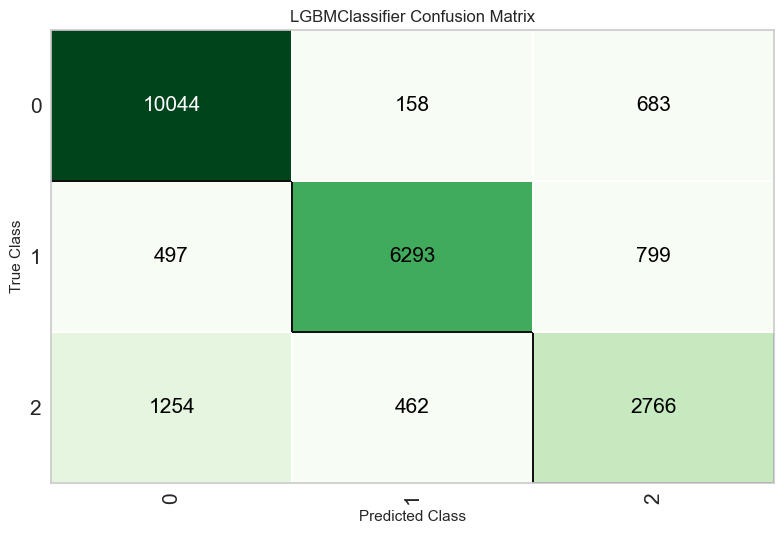

In [ ]:
# Visualización del modelo
plot_model(tuned_dt, plot='confusion_matrix')

# Matriz de confusión

La matriz de confusión revela que el modelo realiza predicciones correctas en la mayoría de los casos, mostrando 10,044 predicciones acertadas para estudiantes graduados, 6,293 predicciones correctas para estudiantes que abandonaron, y 2,766 predicciones acertadas para estudiantes matriculados. No obstante, el modelo presenta algunas confusiones, especialmente entre los estudiantes que abandonaron y aquellos que están matriculados, con 799 casos de estudiantes que abandonaron pero fueron clasificados como matriculados. De manera similar, hay 1,254 estudiantes matriculados que el modelo confundió con graduados. En menor proporción, se observan 462 estudiantes matriculados que el modelo clasificó incorrectamente como que abandonaron. Por último, en 497 casos, el modelo confundió a estudiantes que abandonaron con estudiantes graduados.

Este análisis indica que, aunque el modelo tiene un buen desempeño general, aún tiene margen de mejora en la diferenciación entre estudiantes que abandonaron, se graduaron o permanecen matriculados.

In [ ]:
# Visualización exhaustiva del modelo
mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Evaluar el modelo en el conjunto de prueba
predictions_test = predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8322,0.9436,0.8322,0.8318,0.8306,0.7296,0.7311


In [ ]:
predictions_train = predict_model(tuned_dt, data=exp_clf101.get_config('X_train'))

In [ ]:
y_train = get_config('y_train')
y_test = get_config('y_test')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Error de entrenamiento
print(accuracy_score(y_train,predictions_train["prediction_label"]))
# Error de test
print(accuracy_score(y_test,predictions_test["prediction_label"]))

0.8535155520704978
0.8321571702387175


In [ ]:
try:
    print(roc_auc_score(y_train, predictions_train["prediction_label"], multi_class='ovo'))
except ValueError as e:
    print(f"Se produjo un error: {e}")

Se produjo un error: axis 1 is out of bounds for array of dimension 1


## Entrenamiento del modelo

In [ ]:
%%time
# Finalizar el modelo
final_dt = finalize_model(tuned_dt)

CPU times: total: 12.7 s
Wall time: 5.84 s


In [ ]:
# Variables cuantitativas (Activar D1)
D1 = prueba.get(cuantitativas).copy()

# Variables categóricas
D2 = prueba.get(categoricas).copy()
for k in categoricas:
  D2[k] = D2[k].map(nombre_)
D4 = D2.copy()

# Variables al cuadrado (Activar D1)
for k in cuadrado:
  D1[k+"_2"] = D1[k] ** 2

# Interacciones cuantitativas (Activar D1)
for k in result:
  D1[k[0]+"__"+k[1]] = D1[k[0]] * D1[k[1]]

# Razones
for k in result2:
  k2 = k[0]
  D1[k2[0]+"__coc__"+k2[1]] = D1[k2[0]] / (D1[k2[1]]+0.01)

# Interacciones categóricas
for k in result3:
  D4[k[0]+"__"+k[1]] = D4[k[0]] + "_" + D4[k[1]]

# Interacción cuantitativa vs categórica
D5 = prueba.copy()
contador = 0
for k in result4:
  col1, col2 = k[1], k[0] # categórica, cuantitativa
  if contador == 0:
    D51 = pd.get_dummies(D5[col1],drop_first=True)
    for j in D51.columns:
      D51[j] = D51[j] * D5[col2]
    D51.columns = [col2+"_"+col1+"_"+ str(x) for x in D51.columns]
  else:
    D52 = pd.get_dummies(D5[col1],drop_first=True)
    for j in D52.columns:
      D52[j] = D52[j] * D5[col2]
    D52.columns = [col2+"_"+col1+"_"+ str(x) for x in D52.columns]
    D51 = pd.concat([D51,D52],axis=1)
  contador = contador + 1

In [ ]:

if parametro1==True:
    B1 = pd.concat([D1,D4],axis=1)
    base_modelo2 = pd.concat([B1,D51],axis=1)
    base_modelo2.head(3)
else :
    base_modelo2=prueba

In [ ]:
df_test = base_modelo2
column_types = df_test.dtypes
print(column_types)


id                                                  int64
Marital status                                     object
Application mode                                   object
Application order                                  object
Course                                             object
Daytime/evening attendance                         object
Previous qualification                             object
Previous qualification (grade)                    float64
Nacionality                                        object
Mothers qualification                              object
Fathers qualification                              object
Mothers occupation                                 object
Fathers occupation                                 object
Admission grade                                   float64
Displaced                                          object
Educational special needs                          object
Debtor                                             object
Tuition fees u

In [ ]:
# Realizar predicciones
predictions = predict_model(tuned_dt, data=df_test)

In [ ]:
print(predictions)

           id Marital status Application mode Application order Course  \
0       76518              1                1                 1   9500   
1       76519              1                1                 1   9238   
2       76520              1                1                 1   9238   
3       76521              1               44                 1   9147   
4       76522              1               39                 1   9670   
...       ...            ...              ...               ...    ...   
51007  127525              1                1                 2    171   
51008  127526              2               39                 1   9119   
51009  127527              1                1                 1    171   
51010  127528              1                1                 3   9773   
51011  127529              1                1                 1    171   

      Daytime/evening attendance Previous qualification  \
0                              1                    

In [ ]:
predictions["prediction_label"].value_counts()

prediction_label
0    26594
1    15111
2     9307
Name: count, dtype: int64

In [ ]:
predictions["sc"] = predictions.apply(lambda row: 1 if row["prediction_score"]<0.9 else 0, axis = 1)
predictions["sc"].value_counts()

sc
0    25718
1    25294
Name: count, dtype: int64

In [ ]:
predictions.head(10)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,prediction_label,prediction_score,sc
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,0.000000,0,13.9,-0.3,0.79,1,0.9902,0
1,76519,1,1,1,9238,1,1,128.0,1,1,...,6,6,13.500000,0,11.1,0.6,2.02,0,0.9835,0
2,76520,1,1,1,9238,1,1,118.0,1,1,...,11,5,11.000000,0,15.5,2.8,-4.06,0,0.7094,1
3,76521,1,44,1,9147,1,39,130.0,1,1,...,14,5,11.000000,0,8.9,1.4,3.51,2,0.3658,1
4,76522,1,39,1,9670,1,1,110.0,1,1,...,9,4,10.666667,2,7.6,2.6,0.32,2,0.6470,1
5,76523,1,17,4,9238,1,1,137.0,1,1,...,7,6,14.428572,0,11.1,0.6,2.02,0,0.9812,0
6,76524,1,1,1,9773,1,1,126.0,1,1,...,6,6,13.333333,0,12.7,3.7,-1.70,0,0.9492,0
7,76525,1,44,1,9003,1,39,150.0,1,19,...,6,6,12.666667,0,13.9,-0.3,0.79,0,0.8950,1
8,76526,1,1,2,9773,1,1,131.0,1,38,...,8,5,11.000000,0,8.9,1.4,3.51,1,0.7443,1
9,76527,1,1,1,9254,1,1,111.0,1,19,...,6,6,13.166667,0,11.1,0.6,2.02,0,0.8288,1


## Archivo para Kaggle

In [ ]:
prueba.head(2)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,1,2,3,152.1,0,0,0,0,0,0,18,0,0,7,0,0,0.000000,0,0,8,0,0,0.0,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,19,4,5,116.5,0,0,0,1,0,0,19,0,0,6,7,6,14.857143,0,0,6,6,6,13.5,0,11.1,0.6,2.02


In [ ]:
# Create a DataFrame with 'id' and 'Exited' probabilities
result = pd.DataFrame({
    'id': prueba["id"],
    'Target': predictions['prediction_label']
})
mapping = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}
result["Target"] = result["Target"].map(int)
#result.head(5)

In [ ]:

# Definir el mapeo
mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}

# Aplicar el mapeo
result["Target"] = result["Target"].map(mapping)

# Mostrar los primeros 5 registros
result.head(5)


,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [ ]:
# Save the result to a CSV file
result.to_csv(path + 'HMS_mejor_sin_ing.csv', index=False,sep=",")

In [ ]:
# Guardar y cargar modelos
save_model(tuned_dt, path + 'modelo_lightgbm_sin')

# To load the model later
loaded_model = load_model(path + 'modelo_lightgbm_sin')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
